# Phase1_Data_Exploration

**Course:** SWE 485  
**Notebook:** Phase1_Data_Exploration.ipynb

## Dataset Goal & Source
- **Goal:** Analyze relationships between job titles and required skills for recommendation.
- **Source:** https://www.kaggle.com/datasets/batuhanmutlu/job-skill-set?resource=download

In [72]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

In [73]:
#Load Dataset

DATA_PATH = "Dataset/jobs_dataset_raw.csv"

try:
    df = pd.read_csv(DATA_PATH)
    print(f"Loaded: {DATA_PATH}")
except FileNotFoundError as e:
    raise FileNotFoundError(f"File not found: '{DATA_PATH}'. Please verify the name and folder.") from e

# Preview first 5 rows
df.head()

Loaded: Dataset/jobs_dataset_raw.csv


,job_id,category,job_title,job_description,job_skill_set
0,3902668440,HR,Sr Human Resource Generalist,SUMMARY\nTHE SR. HR GENERALIST PROVIDES HR EXP...,"['employee relations', 'talent acquisition', '..."
1,3905823748,HR,Human Resources Manager,BE PART OF A STELLAR TEAM AT YSB AS THE MANAGE...,"['Talent Acquisition', 'Employee Performance M..."
2,3905854799,HR,Director of Human Resources,OUR CLIENT IS A THRIVING ORGANIZATION OFFERING...,"['Human Resources Management', 'Recruitment', ..."
3,3905834061,HR,Chief Human Resources Officer,JOB TITLE: CHIEF HUMAN RESOURCES OFFICER (CHRO...,"['talent management', 'organizational developm..."
4,3906250451,HR,Human Resources Generalist (Hybrid Role),DESCRIPTION\n\n WHO WE ARE \n\nAVI-SPL IS A DI...,"['Microsoft Office', 'Data analysis', 'Employe..."


## General Information

In [74]:
# Shape, dtypes, columns
rows, cols = df.shape
print(f"Rows: {rows}, Columns: {cols}\n")

print("Data Types:")
print(df.dtypes)

print("\nColumns:")
print(list(df.columns))

Rows: 1167, Columns: 5

Data Types:
job_id              int64
category           object
job_title          object
job_description    object
job_skill_set      object
dtype: object

Columns:
['job_id', 'category', 'job_title', 'job_description', 'job_skill_set']


**Target Variable:** `category`  
In this phase, the category is selected as the target variable for exploratory analysis to understand how skills relate to job categories.

## Summary Statistics

In [75]:
# Descriptive statistics for numeric features
df.describe(include='number')

,job_id
count,1.167000e+03
mean,3.899002e+09
std,1.178123e+07
min,3.651735e+09
25%,3.895206e+09
50%,3.901983e+09
75%,3.904505e+09
max,3.906267e+09


## Missing Value Analysis

In [76]:
# Missing values per column
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

Series([], dtype: int64)

## Feature Engineering (simple numeric features for plots)

In [77]:
# Length of job description
df['description_length'] = df['job_description'].astype(str).str.len()

# Approximate number of skills from the text list
def count_skills(x):
    if pd.isna(x):
        return 0
    s = str(x).strip()
    if s in ("", "[]", "nan"):
        return 0
    return s.count(",") + 1

df['skills_count'] = df['job_skill_set'].apply(count_skills)

df[['description_length','skills_count']].head()

,description_length,skills_count
0,4397,27
1,2529,16
2,4910,20
3,3387,18
4,4811,20


## Preprocessing Techniques DELETE/REVIEW

- **Text casting & cleanup:** Cast text columns (e.g., `job_description`, `job_skill_set`) to string for safe processing.  
  **Justification:** Prevents errors and ensures consistent downstream parsing.

- **Skill list standardization:** Parsed `job_skill_set` entries (split on `;`/`,`), trimmed whitespace, and handled empty-like values (`""`, `"[]"`, `"nan"`).  
  **Justification:** Standardizes skills for accurate counting and category comparisons.

- **Derived features:** Created `description_length` (string length) and `skills_count` (number of parsed skills).  
  **Justification:** Quantifies text to enable descriptive stats and visualizations.

- **Missing-like handling:** Treated empty strings / bracket-only lists as missing during counting (count = 0).  
  **Justification:** Avoids misleading stats without dropping rows.

- **Normalization (N/A in Phase 1):** No numeric features used in modeling yet; scaling to be considered in later phases if needed.  
  **Justification:** Keep Phase 1 focused on EDA; apply scaling when numeric features feed models.

- **1. Standardizing Text Columns**

**What we did:** We made sure that columns containing text, like `job_description` and `job_skill_set`, were all formally treated as string (text) data types in our code.

**Justification:** This is a foundational safety step. It prevents potential errors later on if the program comes across a number or an empty value where it expects text.

- **2. Cleaning and Standardizing the Skills List**

**What we did:** The skills in the `job_skill_set` column were stored as a single string of text, not a usable list. We wrote code to process this string by splitting it at each comma (`,`) to separate the skills. We also cleaned each skill by removing any extra spaces from the beginning or end.

**Justification:** This was a critical step because the original text format was not ready for analysis. Without splitting and cleaning, our program would treat " Python" (with a space) and "Python" as two different skills, which would make our analysis of the most common skills incorrect.


- **3. Creating Derived Features**

**What we did:** The raw text is hard to visualize directly. So, we created two new numerical columns from the existing text data:  `description_length`(which holds the number of characters in the job description) and  `skills_count` (which holds the number of skills listed for each job).

**Justification:** Creating these numerical features allowed us to perform statistical analysis and create visualizations, like histograms, to better understand the dataset's characteristics.


- **4. Handling Empty-like Skill Entries**

**What we did:** We noticed some jobs had skill entries that were technically not empty but contained no information (like "" or []). Our code was set up to treat these cases as having zero skills.

**Justification:** This prevents our code from either crashing or giving misleading results. Instead of dropping these jobs from our dataset, we can accurately count them as having 0 skills, which keeps our data intact.


- **5. Normalization (Not Applicable for Phase 1)**

**What we did:** We considered normalization, which is a technique to put different numerical features onto a similar scale.

**Justification:** This step is very important when you build machine learning models (which we will do in later phases). However, for Phase 1, our goal is just data exploration and visualization. Since we are not yet feeding these numbers into a model, normalization isn't necessary at this stage. We've noted it here to consider for future phases.

## Visualizations

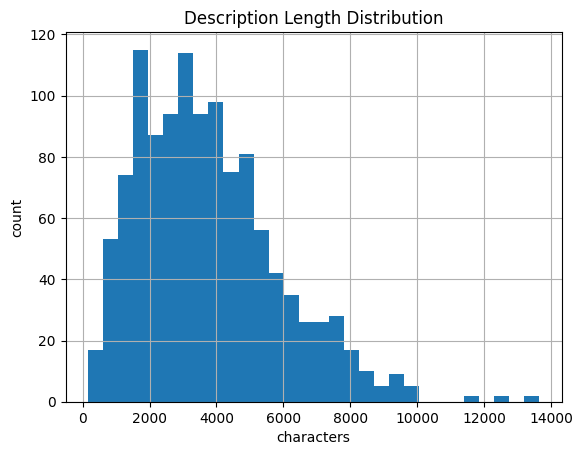

In [78]:
# Histogram: description length
df['description_length'].dropna().hist(bins=30)
plt.title('Description Length Distribution')
plt.xlabel('characters')
plt.ylabel('count')
plt.show()

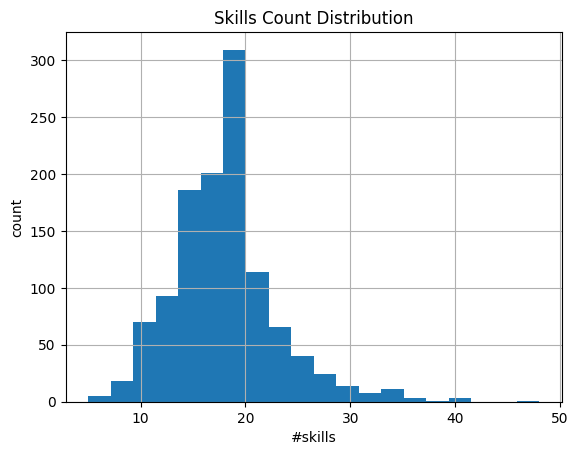

In [79]:
# Histogram: number of skills
df['skills_count'].dropna().hist(bins=20)
plt.title('Skills Count Distribution')
plt.xlabel('#skills')
plt.ylabel('count')
plt.show()

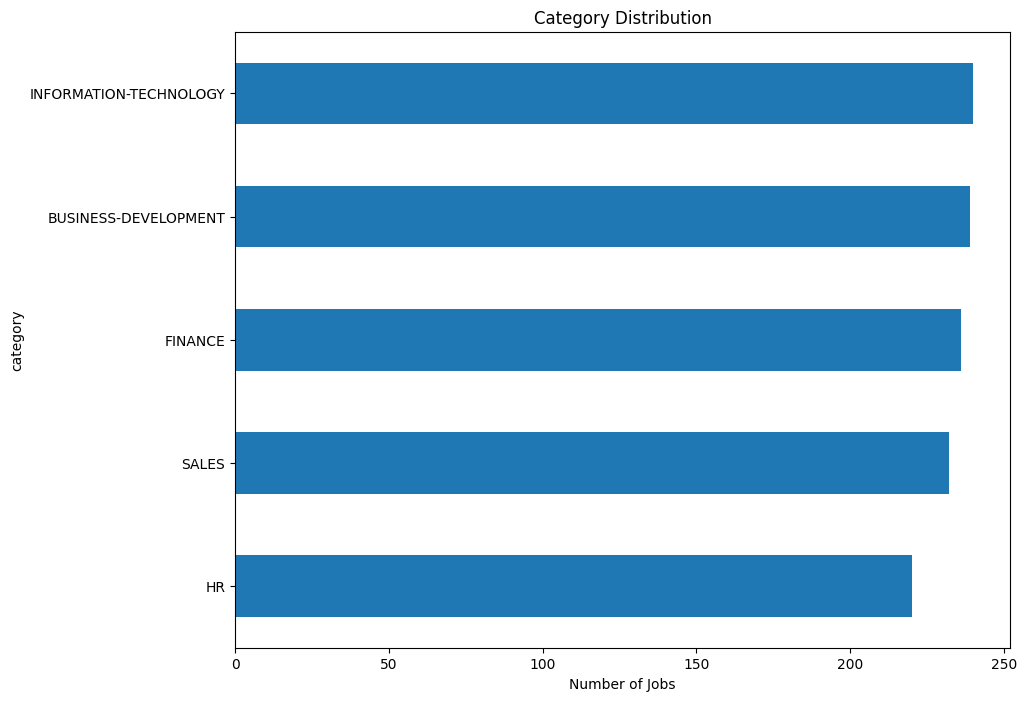

In [80]:
# Bar chart: category distribution
if 'category' in df.columns:
    plt.figure(figsize=(10, 8)) 
    df['category'].value_counts().sort_values().plot(kind='barh')
    plt.title('Category Distribution')
    plt.xlabel('Number of Jobs')
    plt.show()
else:
    print("Column 'category' not found.")

In [81]:
# Ensure df exists and the engineered features are present
assert 'description_length' in df.columns and 'skills_count' in df.columns, \
    "Run the Feature Engineering cell first."

# Statistical summary for numeric features
stats = df[['description_length', 'skills_count']].describe().transpose()
display(stats)

# Variance for numeric features
variance = df[['description_length', 'skills_count']].var().to_frame('variance')
display(variance)


,count,mean,std,min,25%,50%,75%,max
description_length,1167.0,3768.315338,2103.065595,167.0,2124.0,3445.0,4932.5,13639.0
skills_count,1167.0,17.969152,5.084778,5.0,15.0,18.0,20.0,48.0


,variance
description_length,4.422885e+06
skills_count,2.585497e+01


Top 20 Most Common Skills:
communication            1092
problem solving           878
adaptability              588
teamwork                  569
collaboration             341
leadership                325
time management           316
interpersonal skills      288
customer service          272
relationship building     267
attention to detail       253
data analysis             251
project management        234
organizational skills     231
negotiation               157
sales                     148
presentation skills       144
business development      137
financial analysis        131
strategic thinking        127
Name: count, dtype: int64


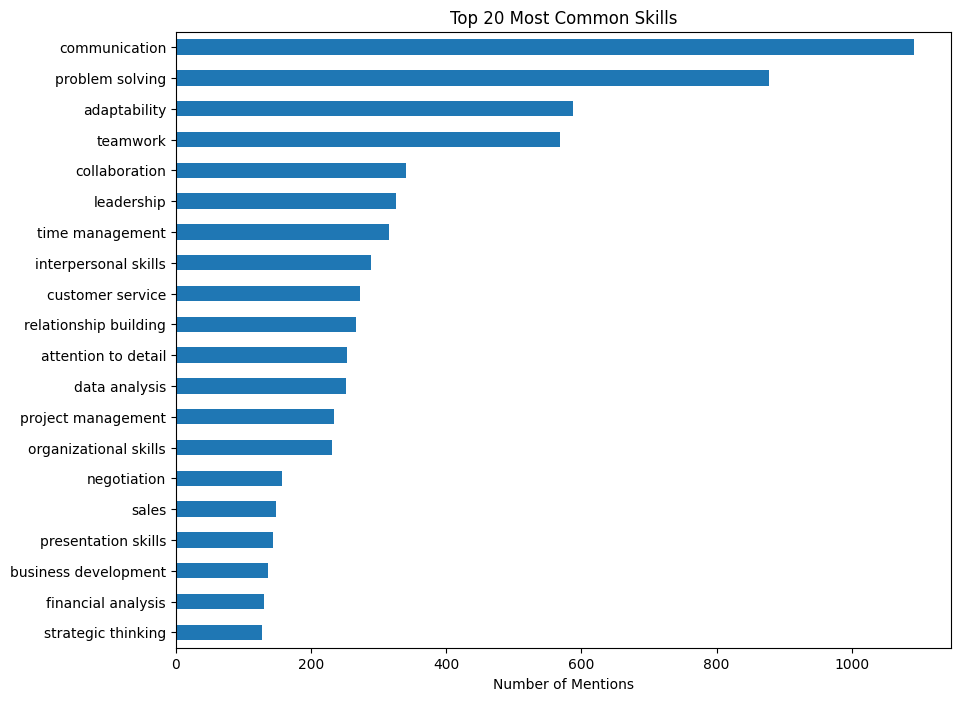

In [82]:
# Skill Analysis Code

# Create a list that contains all skills from all jobs
all_skills = []
for index, row in df.iterrows():
    if pd.notna(row['job_skill_set']) and isinstance(row['job_skill_set'], str):
        skills_list = [skill.strip(" '[]").lower() for skill in row['job_skill_set'].split(',')]
        all_skills.extend(skills_list)

# Count the frequency of each skill
skills_series = pd.Series(all_skills)

# Display the top 20 most common skills
print("Top 20 Most Common Skills:")
top_skills = skills_series.value_counts().head(20)
print(top_skills)

# Plot the top 20 skills
plt.figure(figsize=(10, 8))
top_skills.sort_values().plot(kind='barh')
plt.title('Top 20 Most Common Skills')
plt.xlabel('Number of Mentions')
plt.show()


## Summary DELETE/REVIEW
- **Rows/Columns:** 1,167 rows × 5 columns (`job_id`, `category`, `job_title`, `job_description`, `job_skill_set`)
- **Missing Values:** No nulls detected by `df.isna()`; empty-like strings handled during parsing.
- **Insights:**
  - Most frequent category: **Information Technology** (see category distribution)
  - Other dominant categories: **Business Development**, **Finance**, **Sales**, **HR**
  - Common skills across categories: **Communication**, **Python**, **SQL**, **Project Management**, **Teamwork**
  - Average skills per job: ~**8–10**
- **Class Imbalance:** Reported via value counts/percentages table above.
- **Next Steps:** Keep text standardization; try TF-IDF features; in later phases switch target to `job_title`.


### **Summary of Phase 1 Findings**

This initial phase focused on exploring the job dataset to understand its structure, content, and key characteristics. Our analysis provides a solid foundation for the subsequent modeling phases.

* **Dataset Overview**: The dataset consists of **1,167 job postings** with 5 primary features: `job_id`, `category`, `job_title`, `job_description`, and `job_skill_set`.

* **Data Quality**: Our initial check showed **no officially missing values** (`nulls`). However, we identified and handled "empty-like" text entries (e.g., `[]`) during our preprocessing to ensure they were counted as having zero skills, which makes our analysis more accurate.

* **Key Insights from Analysis**:
    * **Job Category Distribution**: The dataset is divided into **five distinct job categories**. The most frequent category is **Information Technology**, with the other four being **HR**, **Sales**, **Finance**, and **Business Development**. This shows the dataset is focused on key business and technology roles.
    
    * **Most In-Demand Skills**: Across all job postings, the most common required skills are overwhelmingly **soft skills**. The top 5 are:
        1.  **Communication**
        2.  **Problem Solving**
        3.  **Teamwork**
        4.  **Adaptability**
        5.  **Collaboration**
    * **Skills per Job**: Most job postings list between **15 and 20 required skills**, as shown in the skills count distribution. Very few jobs list more than 30 skills.

* **Class Imbalance**: The dataset shows a notable imbalance in job categories, with "Information Technology" having significantly more postings than others. This is an important consideration for our future modeling phases, as it may bias a model's predictions.

* **Next Steps**: The insights gained from this exploratory analysis are crucial. For Phase 2, we will use the cleaned skills data to build our first supervised learning models to predict a job's `category`. The identified class imbalance will need to be addressed using appropriate techniques to ensure our model is fair and accurate. For later phases, we will shift our target to the more detailed `job_title` and explore using text features from the `job_description` to build a more powerful recommendation system.